In [12]:
import cv2 as cv


In [13]:
import matplotlib.pyplot as plt


In [14]:
net = cv.dnn.readNetFromTensorflow("graph_opt.pb")

In [15]:
inWidth = 368
inHeight = 368
thr = 0.2

In [16]:
 BODY_PARTS = { "Nose": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
                "LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
                "RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "REye": 14,
                "LEye": 15, "REar": 16, "LEar": 17, "Background": 18 }

 POSE_PAIRS = [ ["Neck", "RShoulder"], ["Neck", "LShoulder"], ["RShoulder", "RElbow"],
                ["RElbow", "RWrist"], ["LShoulder", "LElbow"], ["LElbow", "LWrist"],
                ["Neck", "RHip"], ["RHip", "RKnee"], ["RKnee", "RAnkle"], ["Neck", "LHip"],
                ["LHip", "LKnee"], ["LKnee", "LAnkle"], ["Neck", "Nose"], ["Nose", "REye"],
                ["REye", "REar"], ["Nose", "LEye"], ["LEye", "LEar"] ]

In [17]:
#BODY_PARTS = {  "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
#              "LShoulder": 5, "LElbow": 6, "LWrist": 7 }

#POSE_PAIRS = [ ["Neck", "RShoulder"], ["Neck", "LShoulder"], ["RShoulder", "RElbow"],
#               ["RElbow", "RWrist"], ["LShoulder", "LElbow"], ["LElbow", "LWrist"]]

In [18]:
img = cv.imread("image.jpg")

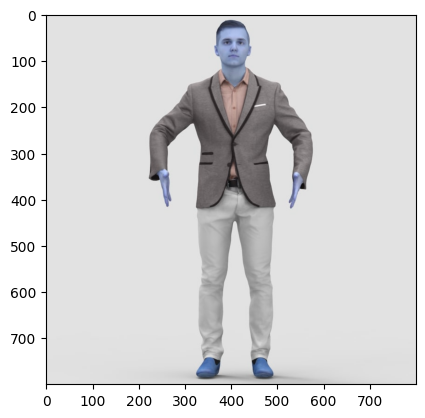

In [19]:
plt.imshow(img)

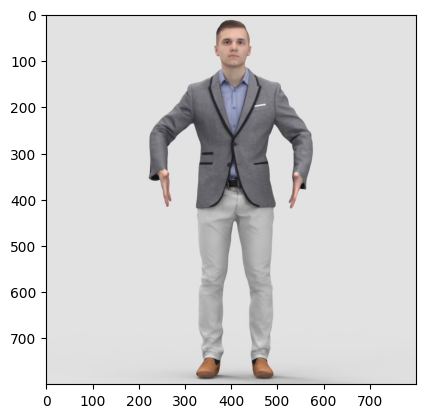

In [20]:
plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))

In [21]:
def pose_estimation(frame):
    frameWidth = frame.shape[1]
    frameHeight = frame.shape[0]
    net.setInput(cv.dnn.blobFromImage(frame, 1.0, (inWidth, inHeight), (127.5, 127.5, 127.5), swapRB=True, crop=False))
    out = net.forward()
    out = out[:, :19, :, :]  # MobileNet output [1, 57, -1, -1], we only need the first 19 elements
    print(len(BODY_PARTS), out.shape)
    assert(len(BODY_PARTS) == out.shape[1])

    points = []
    for i in range(len(BODY_PARTS)):
        # Slice heatmap of corresponging body's part.
        heatMap = out[0, i, :, :]

        # Originally, we try to find all the local maximums. To simplify a sample
        # we just find a global one. However only a single pose at the same time
        # could be detected this way.
        _, conf, _, point = cv.minMaxLoc(heatMap)
        x = (frameWidth * point[0]) / out.shape[3]
        y = (frameHeight * point[1]) / out.shape[2]
        # Add a point if it's confidence is higher than threshold.
        points.append((int(x), int(y)))
        points.append((int(x), int(y)))
        #print(points)

    for pair in POSE_PAIRS:
        partFrom = pair[0]
        partTo = pair[1]
        assert(partFrom in BODY_PARTS)
        assert(partTo in BODY_PARTS)

        idFrom = BODY_PARTS[partFrom]
        idTo = BODY_PARTS[partTo]

        #print(idFrom, idTo)

    for pair in POSE_PAIRS:
        partFrom = pair[0]
        partTo = pair[1]
        assert(partFrom in BODY_PARTS)
        assert(partTo in BODY_PARTS)

        idFrom = BODY_PARTS[partFrom]
        idTo = BODY_PARTS[partTo]

        if points[idFrom] and points[idTo]:
            cv.line(frame, points[idFrom], points[idTo], (0, 255, 0), 3)
            cv.ellipse(frame, points[idFrom], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)
            cv.ellipse(frame, points[idTo], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)

    t, _ = net.getPerfProfile()
    freq = cv.getTickFrequency() / 1000
    cv.putText(frame, '%.2fms' % (t / freq), (10, 20), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0))
    return frame

In [22]:
estimated_image = pose_estimation(img)

19 (1, 19, 46, 46)


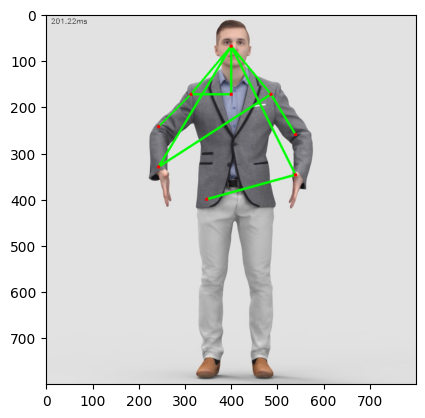

In [23]:
plt.imshow(cv.cvtColor(estimated_image,cv.COLOR_BGR2RGB))



In [24]:
#def angleFn(p1,p2):
    #pass

#def pairsAngle(points_list):
    #for i in range(len(points_list)):
        #pairAngle = angleFn(points_list[i],points_list[i+1 ])

In [25]:
cap = cv.VideoCapture(1)
cap.set(cv.CAP_PROP_FPS, 10)
cap.set(3,800)
cap.set(4,800)

if not cap.isOpened():
    cap = cv.VideoCapture(0)
if not cap.isOpened():
    raise IOError("cannot open webcam")
while cv.waitKey(1) < 0:
    hasFrame, frame = cap.read()
    if not hasFrame:
        cv.waitKey()
        break
        
    frameWidth = frame.shape[1]
    frameHeight = frame.shape[0]
    net.setInput(cv.dnn.blobFromImage(frame, 1.0, (inWidth, inHeight), (127.5, 127.5, 127.5), swapRB=True, crop=False))
    out = net.forward()
    print(out.shape)
    out = out[:, :19, :, :]  # MobileNet output [1, 57, -1, -1], we only need the first 19 elements

    assert(len(BODY_PARTS) == out.shape[1])

    points = []
    for i in range(1,8):#range(len(BODY_PARTS)):
        # Slice heatmap of corresponging body's part.
        heatMap = out[0, i, :, :]

        # Originally, we try to find all the local maximums. To simplify a sample
        # we just find a global one. However only a single pose at the same time
        # could be detected this way.
        _, conf, _, point = cv.minMaxLoc(heatMap)
        x = (frameWidth * point[0]) / out.shape[3]
        y = (frameHeight * point[1]) / out.shape[2]
        # Add a point if it's confidence is higher than threshold.
        # points.append((int(x), int(y)) if conf > thr else None)
        points.append((int(x), int(y)))

        #print(points)

    for pair in POSE_PAIRS:
        partFrom = pair[0]
        partTo = pair[1]
        assert(partFrom in BODY_PARTS)
        assert(partTo in BODY_PARTS)

        idFrom = BODY_PARTS[partFrom]
        idTo = BODY_PARTS[partTo]

        #print(idFrom, idTo)

        if points[idFrom] and points[idTo]:
            cv.line(frame, points[idFrom], points[idTo], (0, 255, 0), 3)
            cv.ellipse(frame, points[idFrom], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)
            cv.ellipse(frame, points[idTo], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)

    t, _ = net.getPerfProfile()
    freq = cv.getTickFrequency() / 1000
    cv.putText(frame, '%.2fms' % (t / freq), (10, 20), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0))
    #print(points)
    interests = [1,2,3,4,5,6,7]
    #angle = tan ((y2-y1)/(x2-x1))
    import  numpy as np
    # a = np.array([32.49, -39.96,-3.86])
    # b = np.array([31.39, -39.28, -4.66])
    # c = np.array([31.14, -38.09,-4.49])
    # f = a-b # normalization of vectors
    # e = b-c # normalization of vectors
    # angle = dot(f, e) # calculates dot product 
    # print degrees(cos(angle))  # calculated angle in radians to degree 
    interested_points = [points[interest] for interest in interests]
    #ar = np.array([interested_points[1]])
    #br = np.array([interested_points[2]]) 
    #cr = np.array([interested_points[3]])
    #fr = np.subtract(ar,br) # normalization of vectors
    #er = np.subtract(br,cr) # normalization of vectors
    #angler = np.dot(fr, er) # calculates dot product for right side
    #if conf > thr else None
    #al = np.array([interested_points[4]])
    #bl = np.array([interested_points[5]])
    #cl = np.array([interested_points[6]])
    #fl = np.subtract(al,bl) # normalization of vectors
    #el = np.subtract(bl,cl) # normalization of vectors
    print(interested_points)
    #anglel = np.dot(fl, el) # calculates dot product for left side
    # comp_speed= change in angles
    #print(np.degrees(np.cos(angler)), np.degrees(np.cos(anglel)), interested_points)
    #print(ar, br, interested_points)
    #print(a)
    
    cv.imshow('pose estimation', frame)

(1, 57, 46, 46)


IndexError: list index out of range